# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [4]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [5]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,29.03
1,NaN,"Jan 02, 1979",1979/01/02,31.35
2,NaN,"Jan 03, 1979",1979/01/03,41.66
3,NaN,"Jan 04, 1979",1979/01/04,47.30
4,NaN,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,56.67
12049,NaN,"Dec 28, 2011",2011/12/28,59.91
12050,NaN,"Dec 29, 2011",2011/12/29,66.64
12051,NaN,"Dec 30, 2011",2011/12/30,68.61


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [7]:
df['Notes']
cond = df['Notes'] == "Total"
df = df.drop(df[cond].index)
df = df.drop('Notes', axis=1)

KeyError: 'Notes'

In [8]:
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,"Jan 01, 1979",1979/01/01,29.03
1,"Jan 02, 1979",1979/01/02,31.35
2,"Jan 03, 1979",1979/01/03,41.66
3,"Jan 04, 1979",1979/01/04,47.30
4,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67
12049,"Dec 28, 2011",2011/12/28,59.91
12050,"Dec 29, 2011",2011/12/29,66.64
12051,"Dec 30, 2011",2011/12/30,68.61


>3) Make a column called Date that is in the pandas datetime format

In [11]:
Date = df['Month Day, Year Code']
df['Date'] = pd.to_datetime(Date)
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date
0,"Jan 01, 1979",1979/01/01,29.03,1979-01-01
1,"Jan 02, 1979",1979/01/02,31.35,1979-01-02
2,"Jan 03, 1979",1979/01/03,41.66,1979-01-03
3,"Jan 04, 1979",1979/01/04,47.30,1979-01-04
4,"Jan 05, 1979",1979/01/05,46.89,1979-01-05
...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67,2011-12-27
12049,"Dec 28, 2011",2011/12/28,59.91,2011-12-28
12050,"Dec 29, 2011",2011/12/29,66.64,2011-12-29
12051,"Dec 30, 2011",2011/12/30,68.61,2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [12]:
df[['Year', 'Month', 'Day']] = df['Date'].astype(str).str.split('-',expand = True)

In [13]:
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day
0,"Jan 01, 1979",1979/01/01,29.03,1979-01-01,1979,01,01
1,"Jan 02, 1979",1979/01/02,31.35,1979-01-02,1979,01,02
2,"Jan 03, 1979",1979/01/03,41.66,1979-01-03,1979,01,03
3,"Jan 04, 1979",1979/01/04,47.30,1979-01-04,1979,01,04
4,"Jan 05, 1979",1979/01/05,46.89,1979-01-05,1979,01,05
...,...,...,...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,56.67,2011-12-27,2011,12,27
12049,"Dec 28, 2011",2011/12/28,59.91,2011-12-28,2011,12,28
12050,"Dec 29, 2011",2011/12/29,66.64,2011-12-29,2011,12,29
12051,"Dec 30, 2011",2011/12/30,68.61,2011-12-30,2011,12,30


In [14]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

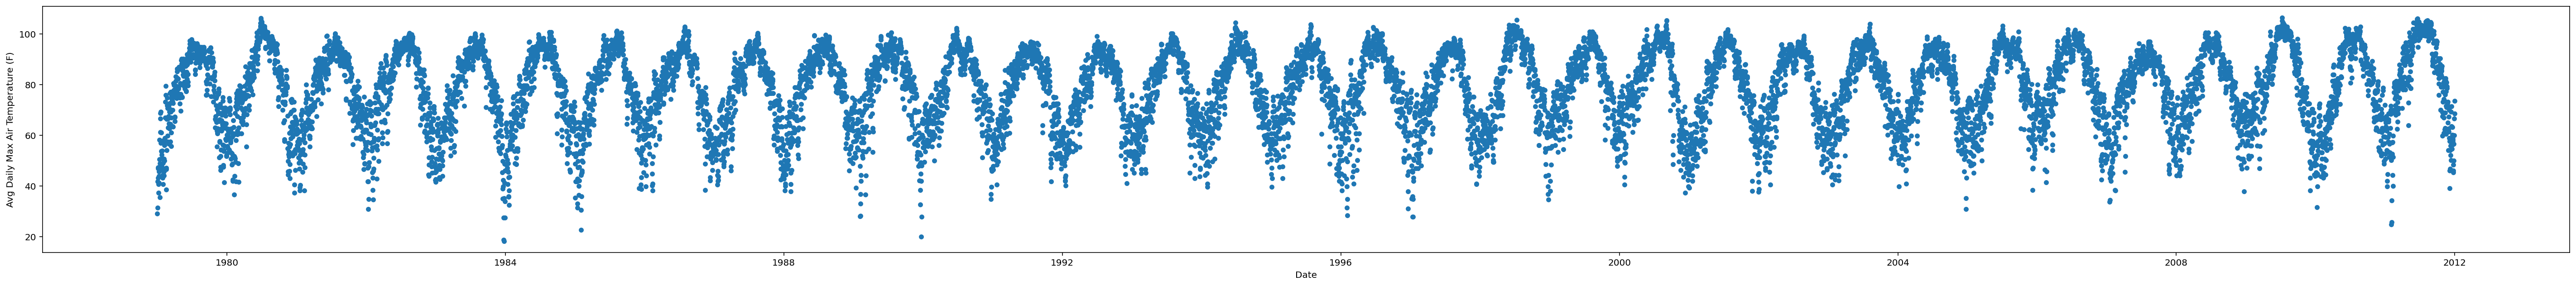

In [20]:
df.plot.scatter('Date', 'Avg Daily Max Air Temperature (F)', figsize=(50,5))

>5) Describe your plot.

In [ ]:
# Average max daily temperatures have been realtively consistent in the same range going back to 1979 as shown by the scatter plot. 

### Adding colors for our graph

In [21]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

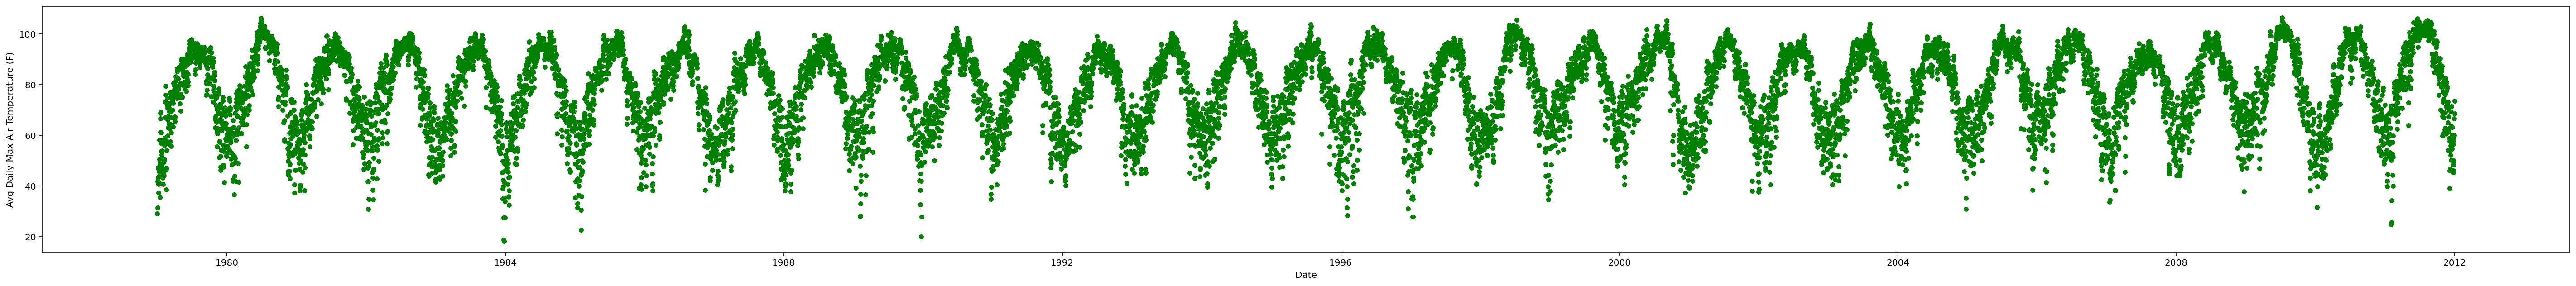

In [24]:
df.plot.scatter('Date', 'Avg Daily Max Air Temperature (F)', color='green', figsize=(50,5))

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [26]:
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2010-07-01') 
m1 = (df['Date'] >= '2010-01-01') & (df['Date'] < '2010-07-01')
subset = df[m1]

>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

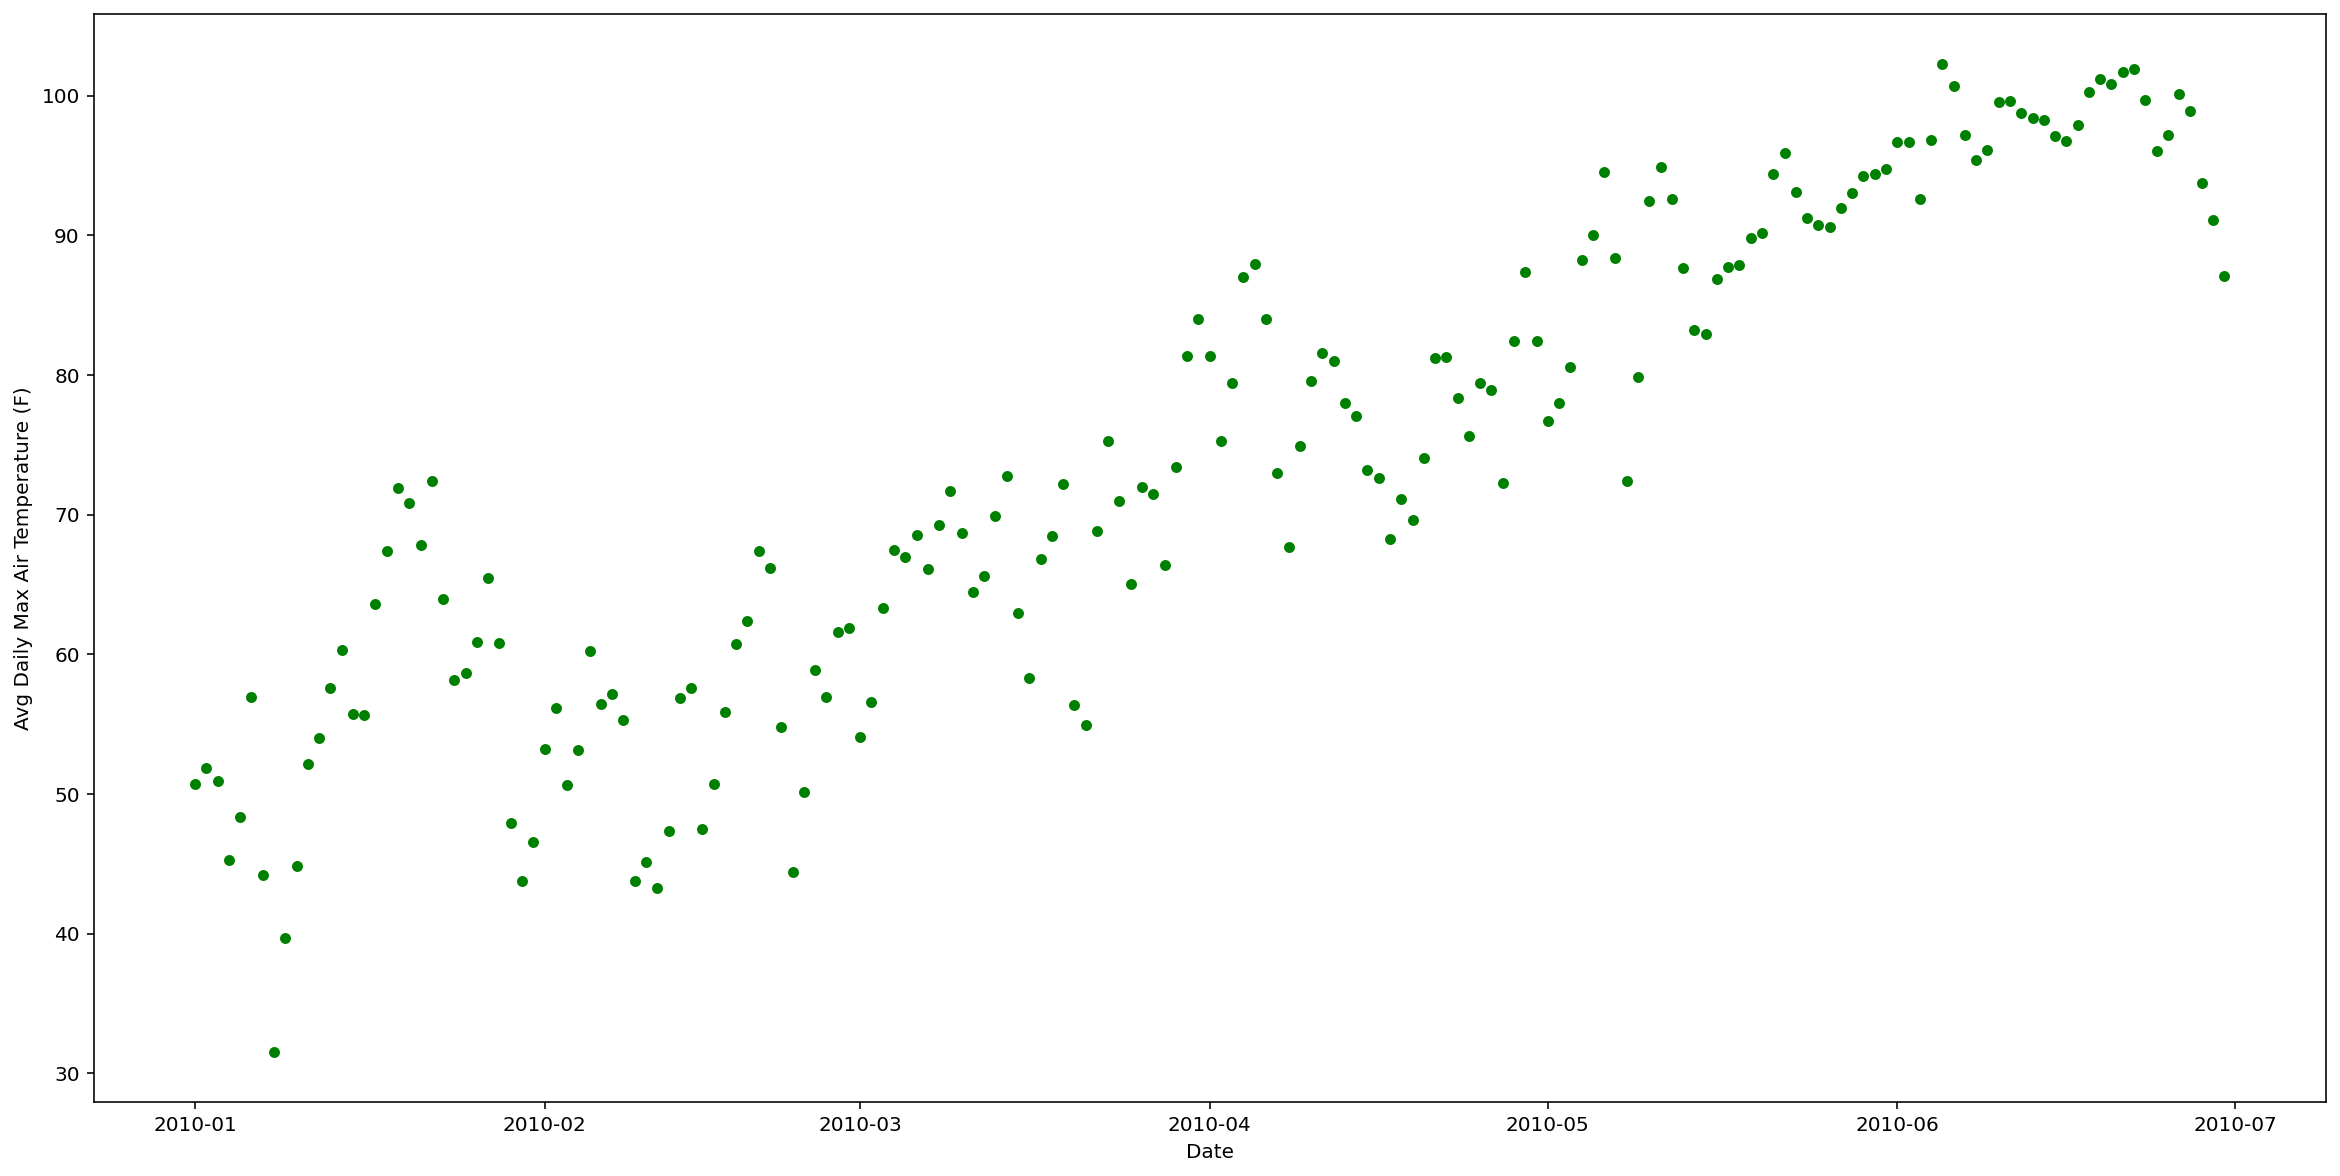

In [31]:
subset.plot.scatter('Date', 'Avg Daily Max Air Temperature (F)', figsize=(20,10), color='green')

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [32]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [33]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [34]:
Y_pred = lin_reg(X,Y)

0.0003508158934033703 -4381.798134296641


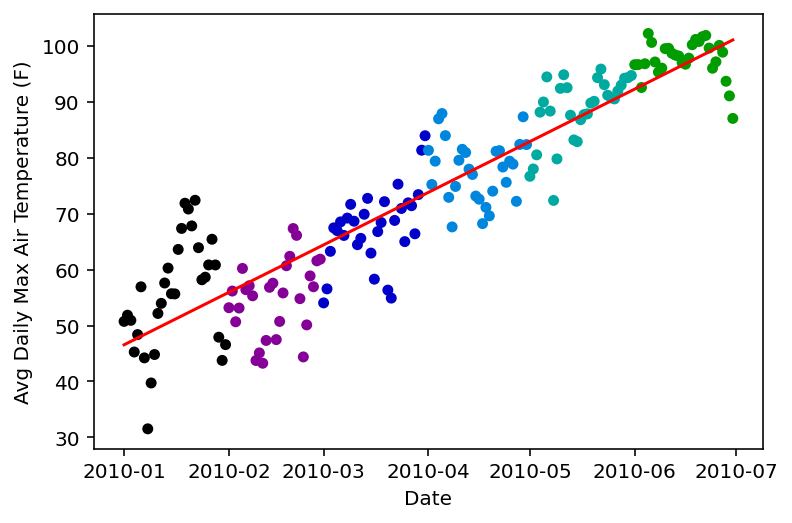

In [35]:
subset.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot([min(subset['Date'].values), max(subset['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

In [ ]:
# slope is 0.0003508158934033703
# y int is -4381.798134296641

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [37]:
print (min(Y_pred),max(Y_pred))

46.564920769837954 101.12380851193029


## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [38]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values
Y_pred = lin_reg(X,Y)

3.072410840971274e-07 75.67019246681011


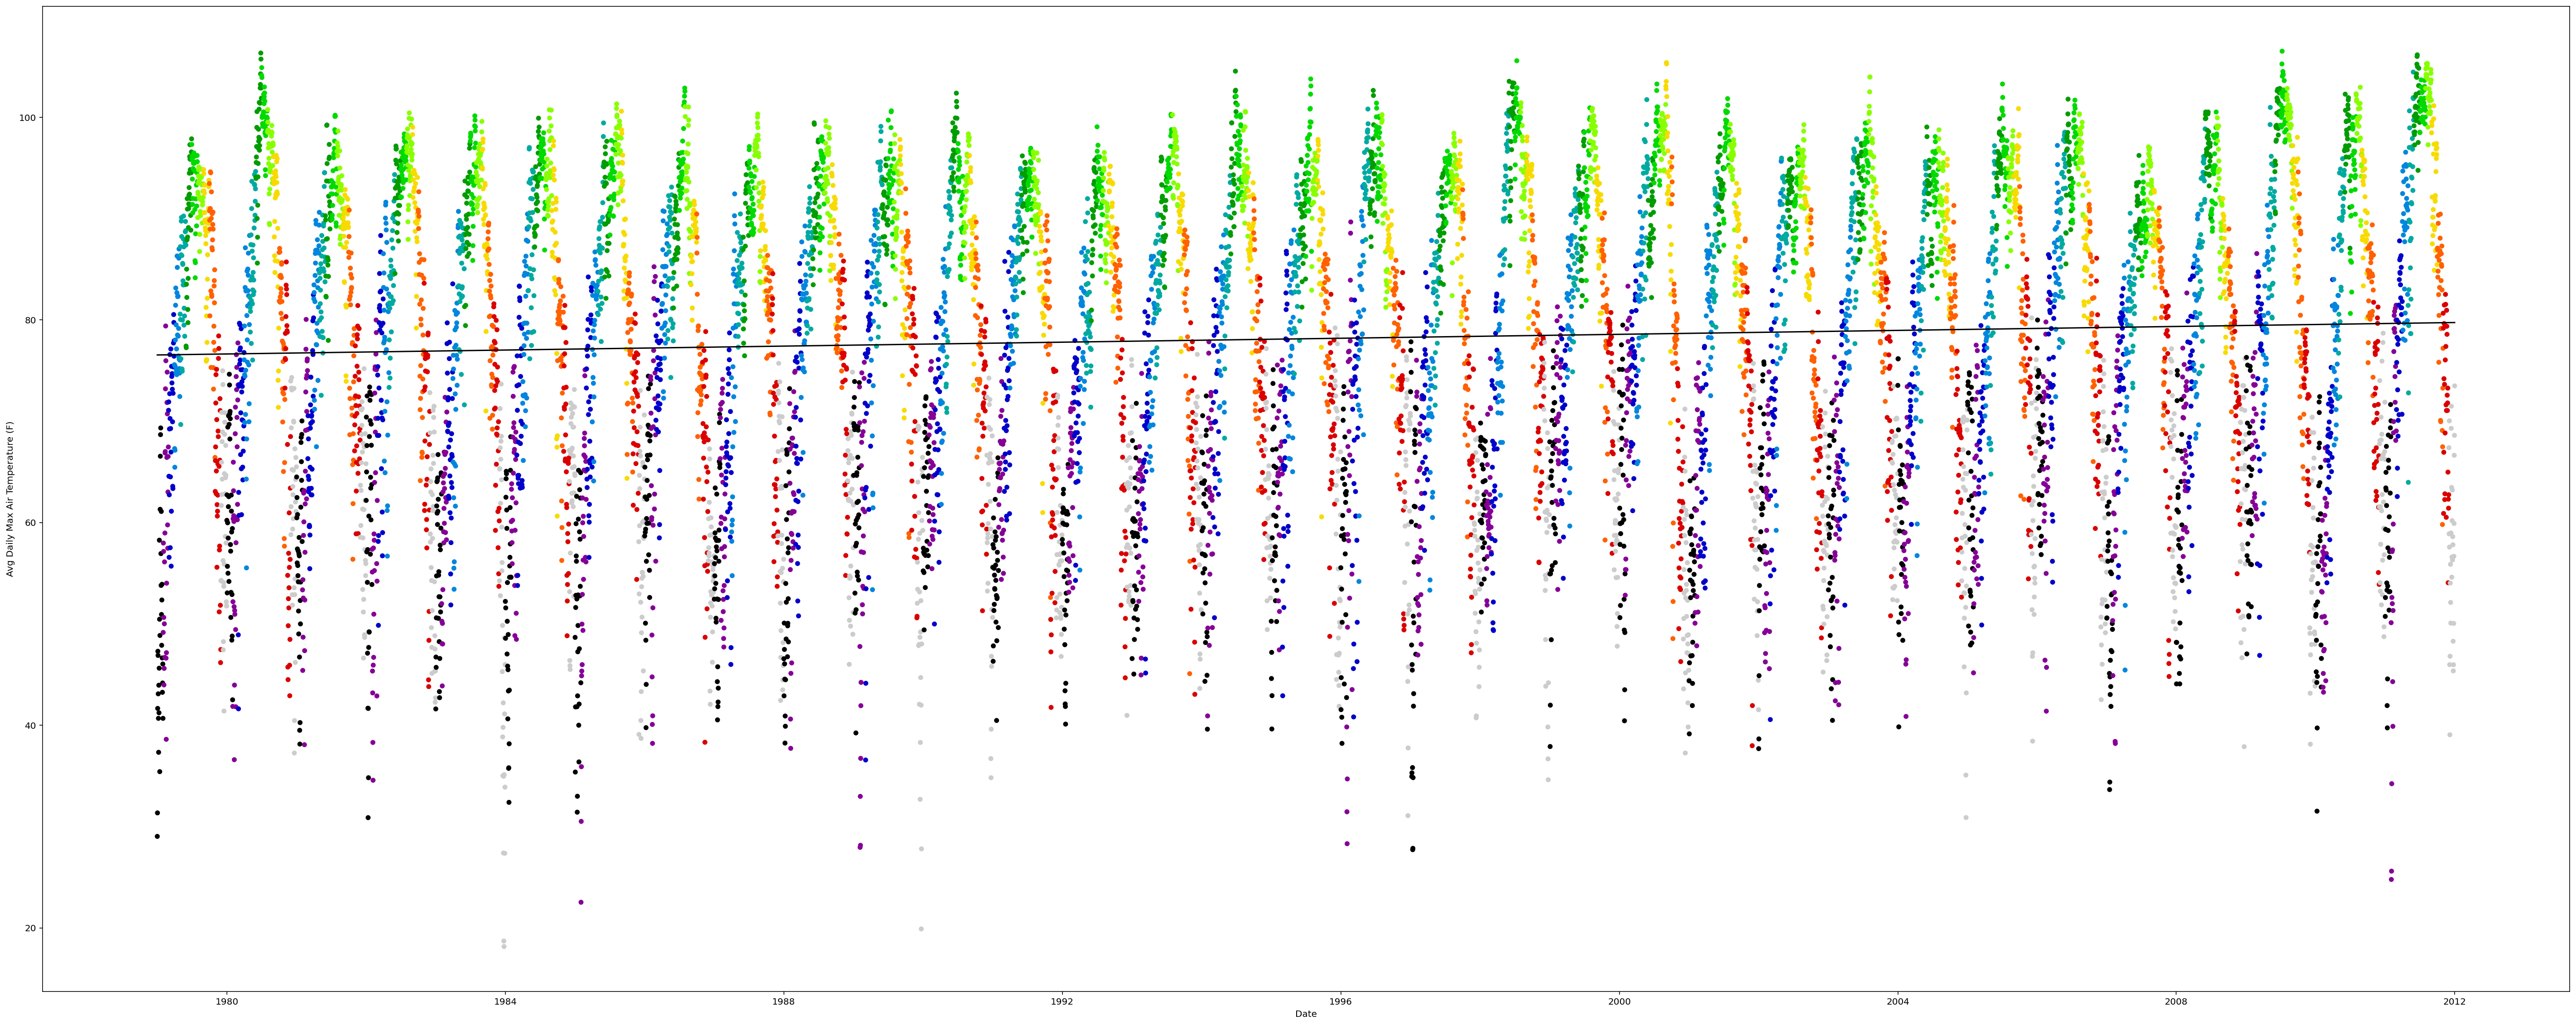

In [43]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', figsize=(50,20), c=df['color'])
plt.plot([min(df['Date'].values), max(df['Date'].values)],[min(Y_pred), max(Y_pred)], color='black')
plt.show()                                      

>12) Is the slope positive or negative? What do you think that means?

In [ ]:
# The slope is slightly positive, meaning there is a slight gradual increase in average temps from 1979 to 2011